## Dashboard for SpaceX

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import Input,Output,callback,dcc,html, Dash

In [2]:
spaceX_df=pd.read_csv("spacex_launch_dash.csv")

In [493]:
spaceX_df['Booster Version Category'].unique()

array(['v1.0', 'v1.1', 'FT', 'B4', 'B5'], dtype=object)

In [4]:
spaceX_df.drop('Unnamed: 0',axis=1,inplace=True)

In [500]:
Launch_site=spaceX_df['Launch Site'].unique()
options_ls=[]
options_ls=[{'label':a,'value':a} for a in Launch_site]
options_ls.append({'label':'All sites','value':'All'})
mapping_={0:'Failed',1:'Successful'}
Outcome_=spaceX_df["class"].unique()
options_outcome=[{'label':mapping_[a],'value':mapping_[a]} for a in Outcome_]
# options_outcome.append({'label':'All','value':'All Outcome'})
options_outcome

[{'label': 'Failed', 'value': 'Failed'},
 {'label': 'Successful', 'value': 'Successful'}]

In [520]:
external_stylesheets_ = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
# from dash import external_stylesheets
app=Dash(__name__,external_stylesheets=external_stylesheets_)


app.layout=html.Div(
    children=[html.H1('SpaceX Launch Records Dashboard',style={'textAlign':'center','color':'#000500','font-size':'40px'}),
 html.Div([html.Div(dcc.Dropdown(id='all_site_dropdown',options=options_ls,value='All',placeholder='Launch Site',searchable=True,style={'border-radius':'10px'})),html.Div(dcc.Dropdown(id='outcome', options=options_outcome,value='Successful',placeholder='Outcome', searchable=True,style={'border-radius':'10px'})),],style={'display':'flex',}),
html.Div(dcc.Graph(id='pie_chart')),
html.Div([html.P('Payload Mass (kg):',style={'color':'white'}),dcc.RangeSlider(id='payload_slider',
                min=0, max=10000, step=10,
                marks={0: {'label':'0','style':{'color':'blue'}},10000: {'label':'10000','style':{'color':'green'}}},
                value=[spaceX_df['Payload Mass (kg)'].min(),spaceX_df['Payload Mass (kg)'].max() ],tooltip={'placement':'bottom',"always_visible":True}),
html.Br()]),
                              
html.Div(dcc.Graph(id='success_payload_scatter_chart')),
                             
                             
                             ])                             

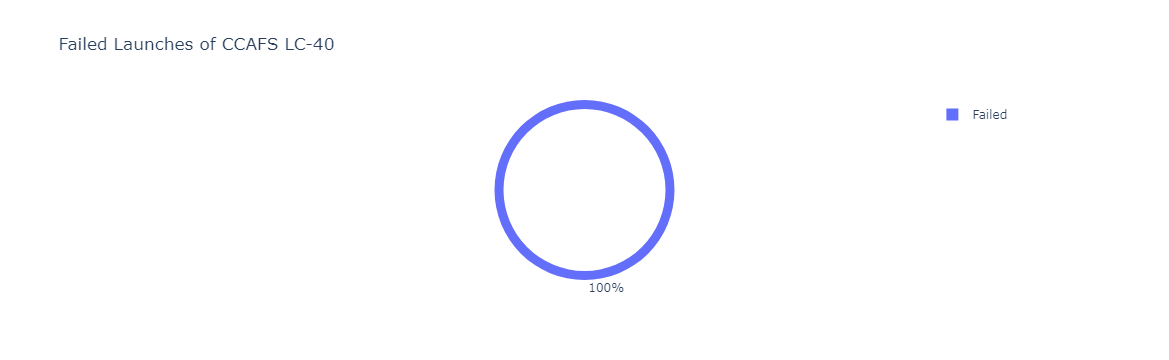

In [484]:
entered_site='CCAFS LC-40'
outcome_=0
__=spaceX_df[(spaceX_df['Launch Site']==entered_site) & (spaceX_df['class']==outcome_)].groupby(['Launch Site','Outcome_']).size().reset_index(name='counts')
            # print(__)
pie_= px.pie(__,names='Outcome_', values='counts',hole=.9, title=f'{mapping.get(outcome_)} Launches of {entered_site}')
pie_

In [521]:
# Function decorator to specify function input and output
@app.callback(Output(component_id='pie_chart', component_property='figure'),
              [Input(component_id='all_site_dropdown', component_property='value'),
               Input(component_id='outcome',component_property='value')])
# pie_=spacex_df[]
def get_pie_chart(entered_site,outcome_):
    mapping={1:'Successful',0:'Failed'}
    filtered_df = spaceX_df
    if entered_site == 'All':
        if outcome_ == 'Successful':
            fig=px.pie(spaceX_df,names='Launch Site', values='class',hole=.9,title=f'The Ratio of {entered_site} Launches which are {outcome_}')
            return fig
        else:
            __=spaceX_df[spaceX_df['Outcome_']==outcome_].groupby(['Launch Site','class']).size().reset_index(name='counts')         
            fig=px.pie(__,names='Launch Site', values='counts',hole=.9,title=f'The Ratio of {entered_site} Launches which are {outcome_}')
            return fig
    else:
        # if outcome_=='Successful':
        ___=spaceX_df[spaceX_df['Launch Site']==entered_site & (spaceX_df['class']==outcome_)].groupby(['Launch Site','class','Outcome_']).size().reset_index(name='counts')   
            # print(___)
        das=px.pie(___,names='Outcome_',values='counts',hole=.9,labels='Outcome_',title=f'The Ratio of {entered_site} Launches which are {outcome_}')
        return das
# else:
#         __=spaceX_df[(spaceX_df['Launch Site']==entered_site) & (spaceX_df['class']==outcome_)].groupby(['Launch Site','Outcome_']).size().reset_index(name='counts')
#         print(entered_site)
#         print(outcome_)
#         print(payL)
#         pie_= px.pie(__,names='Outcome_', values='counts',hole=.9, title=f'{mapping.get(outcome_)} Launches of {entered_site}')
#         return pie_

# @app.callback(Output(component_id='success_payload_scatter_chart',component_property='figure'),
#   [Input(component_id='payload_slider', component_property='value'),Input(component_id='all_site_dropdown',component_property='value'), Input(component_id='outcome',component_property='value')])
# def payloader_slide(mass,entered_site,outcome_):
#     if entered_site=='All':
#         if outcome_=='Successful':
#             payL=spaceX_df[(spaceX_df['Payload Mass (kg)'] >= mass[0]) & (spaceX_df['Payload Mass (kg)']<= mass[1])]
#             # print("1")  
#             fig=px.scatter(payL,x='Payload Mass (kg)',y='Launch Site',color='Booster Version Category',size='Payload Mass (kg)',title='ScatterPlot of All Successful PayLoad Mass')
#             return fig
#         else:
#             payL=spaceX_df[(spaceX_df['Payload Mass (kg)'] >= mass[0]) & (spaceX_df['Payload Mass (kg)']<= mass[1]) &(spaceX_df['Outcome']==outcome_)]
#             # print('2')
#             fig=px.scatter(payL,x='Payload Mass (kg)',y='Launch Site',color='Booster Version Category',size='Payload Mass (kg)', title='ScatterPlot of All Successful PayLoad Mass')
#             return fig
#             # print(f)
#     else:
#         if outcome_=='All Outcome':
#             payL=spaceX_df[(spaceX_df['Payload Mass (kg)'] >= mass[0]) & (spaceX_df['Payload Mass (kg)']<= mass[1])& (spaceX_df['Launch Site']==entered_site)]
#             # print('3')
#             fig=px.scatter(payL,x='Payload Mass (kg)',y='Launch Site', color='Booster Version Category',size='Payload Mass (kg)', title=f'ScatterPlot  of successful {entered_site} PayLoad Mass between {mass[0]} and {mass[1]}')
#             return fig
#         else:
#             payL=spaceX_df[(spaceX_df['Payload Mass (kg)'] >= mass[0]) & (spaceX_df['Payload Mass (kg)']<= mass[1]) &(spaceX_df['Outcome']==outcome_) & (spaceX_df['Launch Site']==entered_site)]
#             fig=px.scatter(payL,x='Payload Mass (kg)',y='Launch Site', color='Booster Version Category',size='Payload Mass (kg)', title=f'ScatterPlot  of successful {entered_site} PayLoad Mass between {mass[0]} and {mass[1]}')
#             return fig

        # return the outcomes piechart for a selected site
if __name__=='__main__':
    app.run_server(port=8081,host= '127.0.0.2',debug=True)

In [41]:
%%html
From the Dashboard above, it can be deducted that:
<ol>
<li><b>KSC LC-39A</b> has the highest amount of <i>succesful lauches<i> amasing up to <b>42%</b> of the succesful launches </li>
<li><b>CCAFS SLC-40</b> has the lowest amount of </>successful launches</i> with just <b>13%</b> </li>
<li>The <i>highest launch success rate</i> happend with <b>VAFB SLC-4E</b> having <b>9600 kg</b> Payload Mass </li>
<li>The <i>lowest launch success rate</i> happend with <b>CCAFS SLC-40</b> having <b>362 kg</b> Payload Mass </li>
<li><b>The F9 Booster Version</b> with the highest success rate is <b>FT</b></li>
</ol>
<style>
 b{
     font-weight:1500;
},
li{
    background-color:lightblue;
    font-family:verdana;
}
</style>